#Optimización de precio de productos usando regresión

Optimizaremos el precio futuro en base a la relación entre la data historica de precios y ventas.

##Librerias

In [28]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

#Data

In [29]:
import pandas as pd

df = '/content/drive/MyDrive/Data Kaggle/beef.csv'
df = pd.read_csv(df)

df.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


In [140]:
df.tail()

,Year,Quarter,Quantity,Price
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667
90,1999,3,17.6689,289.2333


In [141]:
df.describe()

,Year,Quarter,Quantity,Price
count,91.000000,91.000000,91.000000,91.000000
mean,1987.879121,2.483516,18.403309,250.440293
std,6.604435,1.119153,1.813343,37.010231
min,1977.000000,1.000000,15.891500,142.166700
25%,1982.000000,1.500000,17.043950,231.333350
50%,1988.000000,2.000000,18.167800,250.100000
75%,1993.500000,3.000000,19.358650,280.716700
max,1999.000000,4.000000,23.405400,300.400000


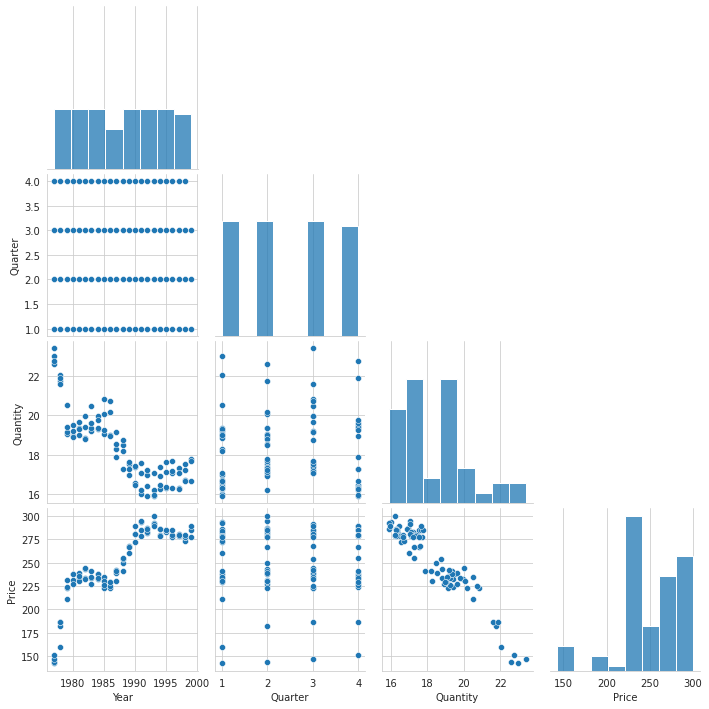

In [165]:
sns.set_style("whitegrid")
sns.pairplot(df, corner=True)

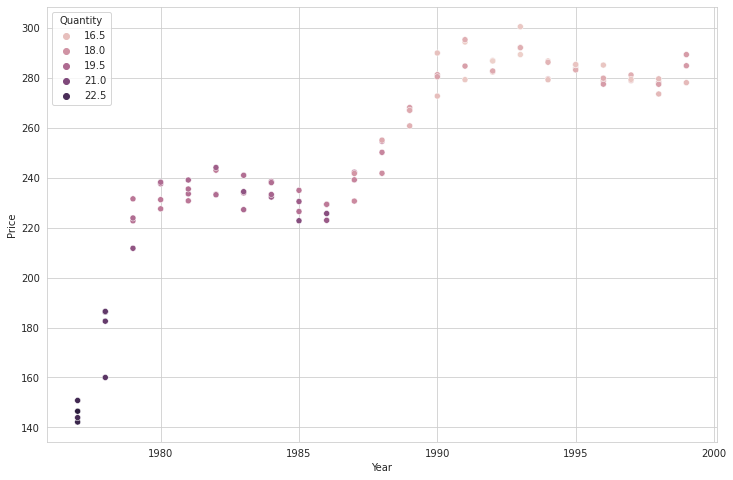

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(data= df, x='Year', y='Price', hue='Quantity')

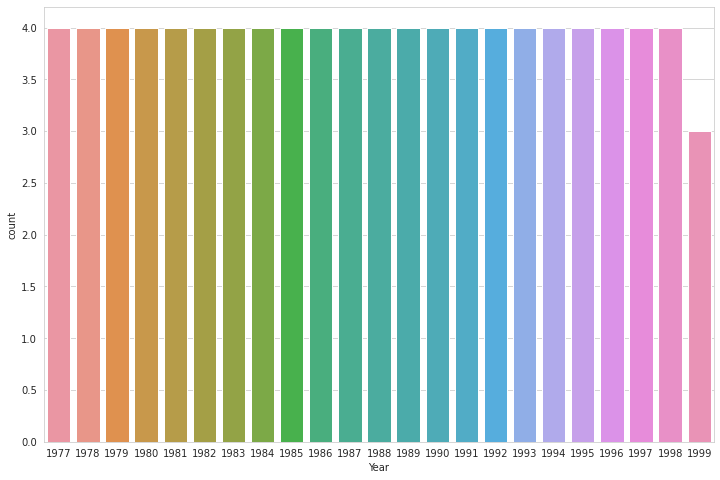

In [159]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'Year', data =df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


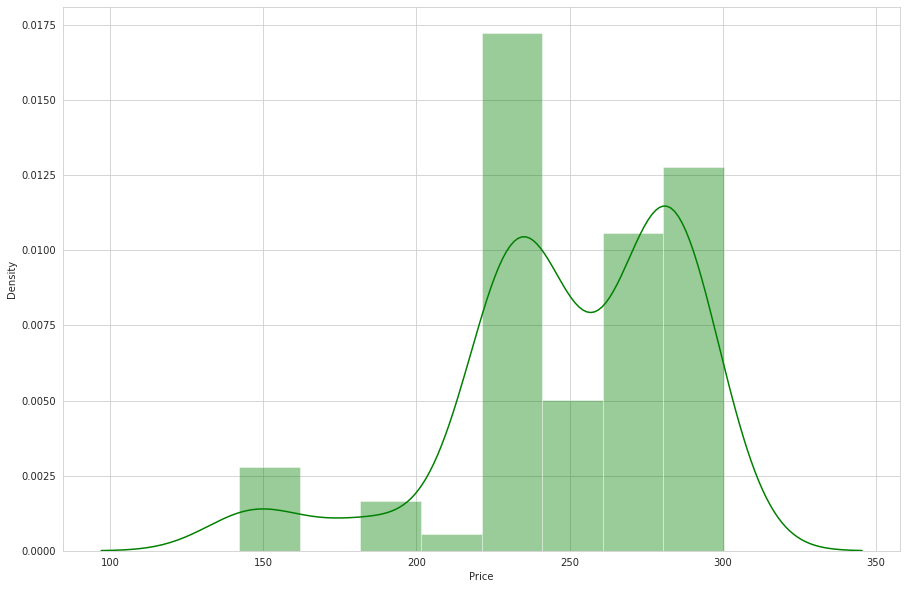

In [169]:
plt.figure(figsize=(15,10))
sns.distplot(df.Price, color='green', kde=True)

##Funciones de ganancia

In [32]:
#price = df["Quantity"] * df["Price"]

#profit = revenue - cost

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000
...,...,...,...,...
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667


##Definimos la función de demanda

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


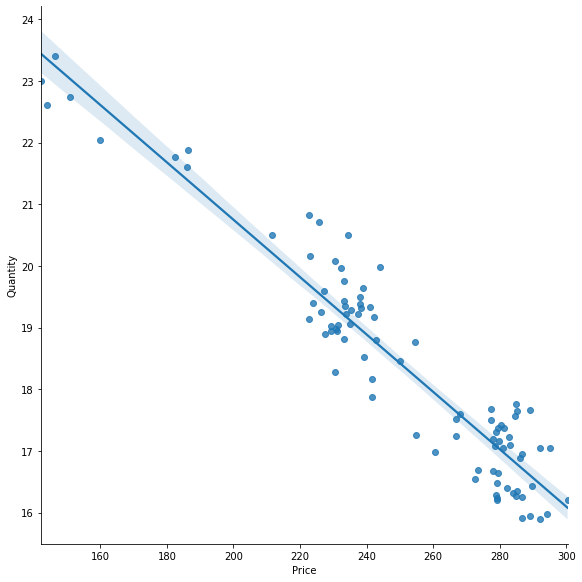

In [31]:
#curva de demanda
sns.lmplot(x = "Price", y = "Quantity", 
data = df, size = 8)

Para encontrar la curva de demanda vamos a ajustar un modelo de regresion OLS

In [27]:
# fit el modelo OLS
model = ols("Quantity ~ Price", data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.69e-46
Time:                        00:24:37   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

##Encontramos la ganancia y maximizamos el precio

Tomamos el valor del intercepto y el coeficiente de Price

In [ ]:
# tomamos los coeficientes de la regresión
#quantity = 30.05 - 0.0465 * price

#profit = (30.05 - 0.0465 * price) * price - cost

Por ultimo para encontrar el precio optimo que buscamos de un rango de opciones, generamos el siguiente codigo

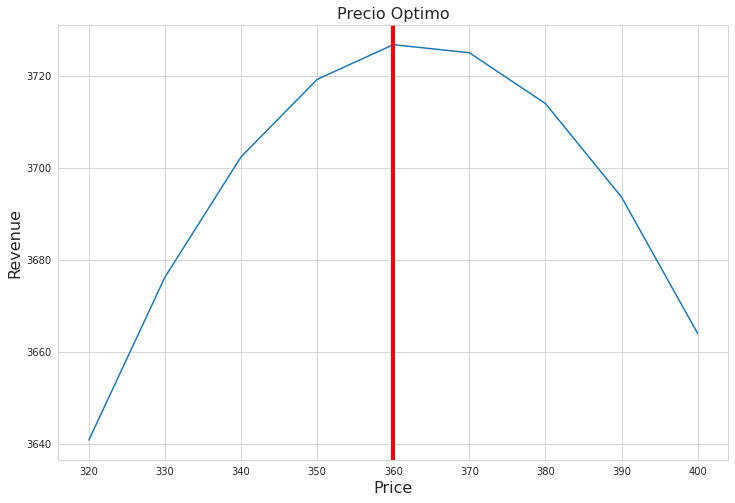

In [148]:
# rango de diferentes precios para encontrar el optimo
Price = [320, 330, 340, 350, 360, 370, 380, 390, 400]


# asumimos un costo fijo
cost = 80
Revenue = []
for i in Price:
   quantity_demanded = 30.05 - 0.0465 * i
   
   # funcion de ganancias
   Revenue.append((i-cost) * quantity_demanded)

# creamos un df con precio y ganancias
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})

# precio en el cual es revenue es maximo
max_revenue = profit[profit['Revenue'] == profit['Revenue'].max()]

#ploteamos los ingresos frente a los precios
plt.figure(figsize=(12,8))
plt.plot(profit["Price"], profit["Revenue"])
plt.axvline(x = max_revenue.Price.values, linewidth=4, color='r')
plt.title('Precio Optimo', size = 16 )
plt.xlabel('Price', size = 16)
plt.ylabel('Revenue', size = 16)

plt.show()

In [77]:
# precio en el cual es revenue es maximo
max_revenue

,Price,Revenue
4,360,3726.8


##Conclusiones
A traves del uso de regresión lineal es posible encontrar el precio optimo, para poder maximizar los ingresos, usando una conbinacion de teoria economica y modelamiento estadistico.